In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Netflix_Viewing_Logs_Dataset.csv')

In [3]:
df.head()

,Unnamed: 0,user_id,content_id,watch_duration_minutes,device_used,watch_time,rating_given,age,country,preferred_genre,content_type,genre,duration_minutes
0,0,380,955,147.0,Tablet,2024-07-30 08:42:52.381395,4.0,23,Canada,Documentary,Movie,Drama,155
1,1,353,955,7.0,Tablet,2024-08-23 08:42:52.421287,5.0,47,Canada,Horror,Movie,Drama,155
2,2,437,955,89.0,Laptop,2024-06-01 08:42:52.390011,1.0,33,Germany,Sci-Fi,Movie,Drama,155
3,3,380,1688,121.0,Mobile,2024-11-27 08:42:52.381990,2.0,23,Canada,Documentary,Movie,Documentary,44
4,4,13,1688,174.0,Mobile,2024-07-18 08:42:52.420244,2.0,41,Australia,Horror,Movie,Documentary,44


In [4]:
df.shape

(5000, 13)

##### Our dataset has 5000 rows and 13 columns but 1st column that is unnamed 0 contains row indexes so either we can remove or make the column as index column

In [5]:
df=pd.read_csv('Netflix_Viewing_Logs_Dataset.csv',index_col=0)

# or df=df.drop(columns=["Unnamed: 0"])

df.head(3)

,user_id,content_id,watch_duration_minutes,device_used,watch_time,rating_given,age,country,preferred_genre,content_type,genre,duration_minutes
0,380,955,147.0,Tablet,2024-07-30 08:42:52.381395,4.0,23,Canada,Documentary,Movie,Drama,155
1,353,955,7.0,Tablet,2024-08-23 08:42:52.421287,5.0,47,Canada,Horror,Movie,Drama,155
2,437,955,89.0,Laptop,2024-06-01 08:42:52.390011,1.0,33,Germany,Sci-Fi,Movie,Drama,155


In [6]:
## Now we will again check the shape of the data
df.shape

(5000, 12)

###### So we have sucessfully remove and unnecessary column 

In [7]:
# Extracting Column names 
df.columns

Index(['user_id', 'content_id', 'watch_duration_minutes', 'device_used',
       'watch_time', 'rating_given', 'age', 'country', 'preferred_genre',
       'content_type', 'genre', 'duration_minutes'],
      dtype='object')

In [8]:
#### Now we will check the types for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 5000 non-null   int64  
 1   content_id              5000 non-null   int64  
 2   watch_duration_minutes  4950 non-null   float64
 3   device_used             4970 non-null   object 
 4   watch_time              5000 non-null   object 
 5   rating_given            4448 non-null   float64
 6   age                     5000 non-null   int64  
 7   country                 5000 non-null   object 
 8   preferred_genre         5000 non-null   object 
 9   content_type            5000 non-null   object 
 10  genre                   5000 non-null   object 
 11  duration_minutes        5000 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 507.8+ KB


##### Since watch_time contains date and time it should be in datetime format but from above we can see that it is object type so we will change that , rest of the columns has correct data type

Converting watch time column from object to datetime format 

In [9]:
df['watch_time'] = pd.to_datetime(df['watch_time'])
df['watch_time'].head(3)

0   2024-07-30 08:42:52.381395
1   2024-08-23 08:42:52.421287
2   2024-06-01 08:42:52.390011
Name: watch_time, dtype: datetime64[ns]

In [10]:
#### Checking that how many null values are there in each column
df.isnull().sum()

user_id                     0
content_id                  0
watch_duration_minutes     50
device_used                30
watch_time                  0
rating_given              552
age                         0
country                     0
preferred_genre             0
content_type                0
genre                       0
duration_minutes            0
dtype: int64

 We got null values for columns :-

 1)watch_duration_minutes :50  
 2)device_used :30  
 3)rating_given :552

#####  ValueCounts : We will check value counts of each category for every categorical column except wacth time.That is how many categories are there and how many times are they repeated 

In [11]:
df['device_used'].value_counts()

device_used
Tablet    1276
Mobile    1236
TV        1232
Laptop    1226
Name: count, dtype: int64

In [12]:
df['country'].value_counts()

country
Germany      948
USA          894
India        830
UK           804
Canada       772
Australia    752
Name: count, dtype: int64

In [13]:
df['preferred_genre'].value_counts()

preferred_genre
Sci-Fi         788
Documentary    762
Drama          743
Action         703
Romance        695
Horror         667
Comedy         642
Name: count, dtype: int64

In [14]:
df['content_type'].value_counts()

content_type
TV Show    2524
Movie      2476
Name: count, dtype: int64

In [15]:
df['genre'].value_counts()

genre
Drama          750
Documentary    749
Horror         717
Romance        716
Action         693
Comedy         689
Sci-Fi         686
Name: count, dtype: int64

#### Describe it is used for numeric data it gives summary statistic

In [16]:
df.describe(include=['int','float'])

,user_id,content_id,watch_duration_minutes,rating_given,age,duration_minutes
count,5000.0000,5000.000000,4950.000000,4448.000000,5000.000000,5000.000000
mean,247.7950,1503.282200,93.425253,3.199191,44.162200,104.530200
std,144.1893,852.811619,56.224800,1.381519,15.056867,42.548555
min,1.0000,1.000000,5.000000,1.000000,18.000000,30.000000
25%,123.0000,788.500000,50.000000,2.000000,32.000000,68.000000
50%,249.0000,1512.000000,92.000000,3.000000,45.000000,106.000000
75%,372.0000,2226.250000,137.000000,4.000000,57.000000,141.000000
max,500.0000,2999.000000,500.000000,5.000000,69.000000,179.000000


In [17]:
df.head(1)

,user_id,content_id,watch_duration_minutes,device_used,watch_time,rating_given,age,country,preferred_genre,content_type,genre,duration_minutes
0,380,955,147.0,Tablet,2024-07-30 08:42:52.381395,4.0,23,Canada,Documentary,Movie,Drama,155


## Visualization

#### For numerical columns 

Text(0.5, 1.0, 'Boxplot for Age column')

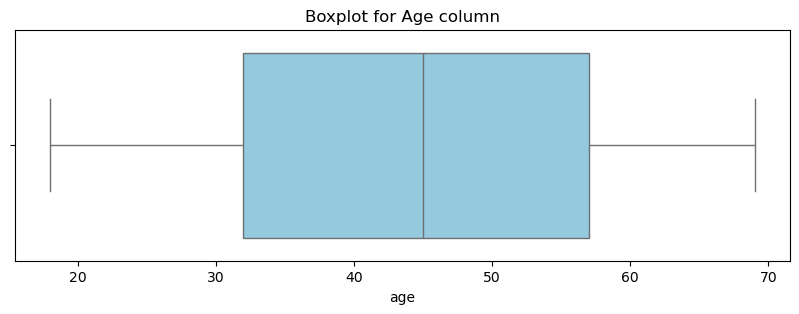

In [18]:
plt.figure(figsize=(10,3))
sns.boxplot(x='age',data=df,color='skyblue')
plt.title('Boxplot for Age column')

Text(0.5, 1.0, 'Watch Duration')

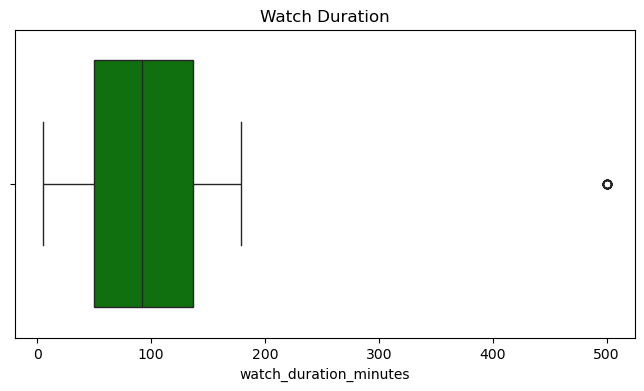

In [19]:
plt.figure(figsize=(8,4))
sns.boxplot(x='watch_duration_minutes',data=df,color='green')
plt.title('Watch Duration')

Text(0, 0.5, 'Frequency')

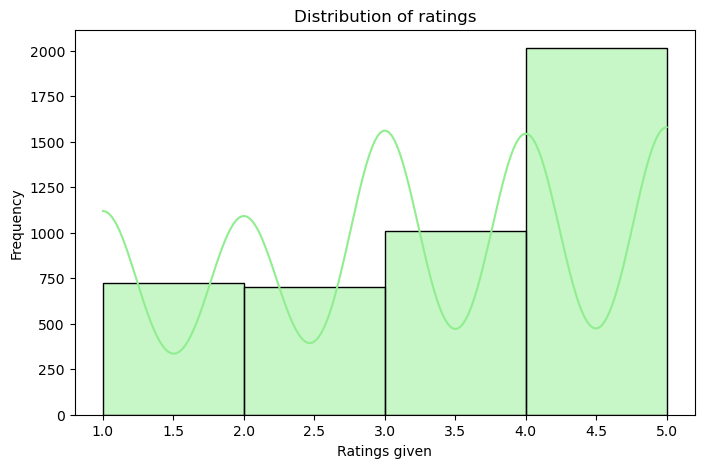

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(df['rating_given'].dropna(),bins=4,kde=True,color='lightgreen')
plt.title('Distribution of ratings')
plt.xlabel('Ratings given')
plt.ylabel('Frequency')

#### For categorical columns 

C:\Users\siddh\AppData\Local\Temp\ipykernel_11252\2092613859.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='country',data=df,palette='coolwarm')


Text(0.5, 1.0, 'Country wise Frequency')

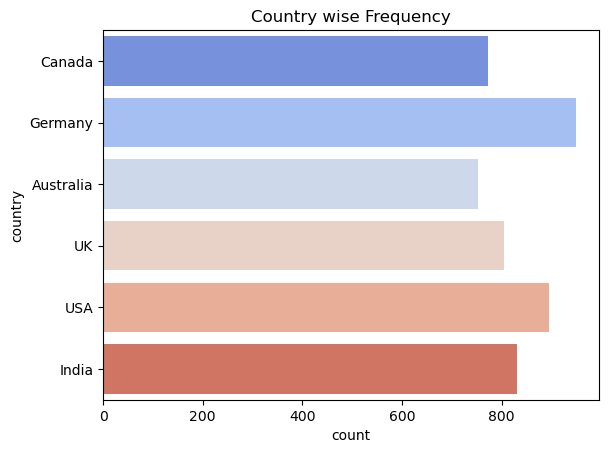

In [21]:
sns.countplot(y='country',data=df,palette='coolwarm')
plt.title('Country wise Frequency') 

Text(0.5, 1.0, 'Count of each genre')

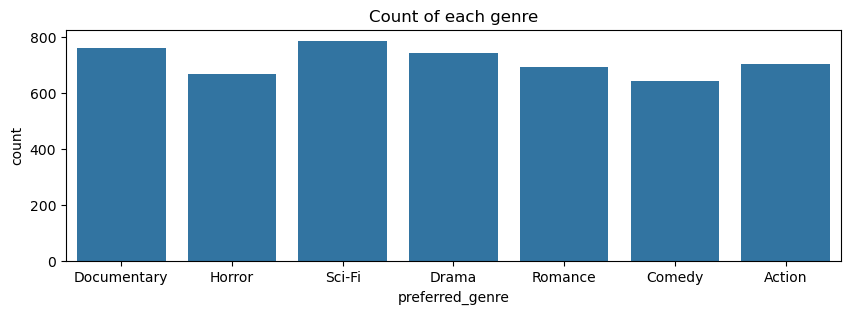

In [22]:
plt.figure(figsize=(10,3))
sns.countplot(x='preferred_genre',data=df)
plt.title('Count of each genre') 

Text(0, 0.5, 'Frequency')

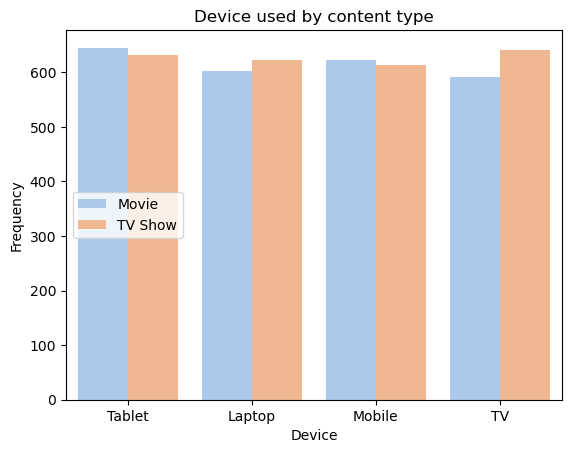

In [23]:
sns.countplot(x='device_used',hue='content_type',data=df,palette='pastel')
plt.legend(loc='center left')
plt.title('Device used by content type')
plt.xlabel('Device')
plt.ylabel('Frequency')

#### Exploring relationship betweem age and watch duration in minutes

Text(0.5, 1.0, 'Relationship between age and watch duration')

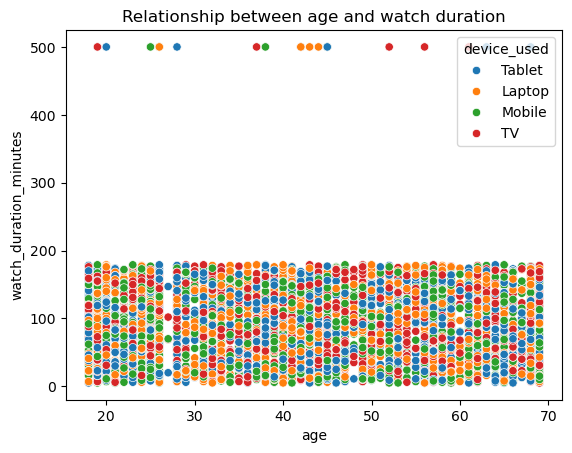

In [24]:
sns.scatterplot(data=df,x='age',y='watch_duration_minutes',hue='device_used')
plt.title('Relationship between age and watch duration')

#### From above figure we conclude that :
##### No Clear Trend Between Age & Watch Duration 
##### Heavy Clustering at Lower Watch Durations Only a few users go above 200 minutes, which could be outliers.
##### Device Usage is Diverse Across Ages


In [25]:
## Checking whether there any duplicates in the data 
df.duplicated().sum()

0

### Null Values 
Previously we have checked null values now we are checking its percentage also 

In [26]:
null1=df['watch_duration_minutes'].isnull().sum()
print(f'Null values for watch_duration_minutes : {null1}')

null2=df['device_used'].isnull().sum()
print(f'Null values for device_used : {null2}')

null3=df['rating_given'].isnull().sum()
print(f'Null values for rating_given : {null3}')

Null values for watch_duration_minutes : 50
Null values for device_used : 30
Null values for rating_given : 552


##### Percentage  

In [27]:
Percent_watch = (null1/len(df['watch_duration_minutes']))*100
Percent_watch

watch_null=df['watch_duration_minutes']        #Storing column with null values later we can compare

In [28]:
Percent_device = (null2/len(df['device_used']))*100
Percent_device

device_null=df['device_used']                    #Storing column with null values later we can compare

In [29]:
Percent_rating = (null3/len(df['rating_given']))*100
Percent_rating

rating_null=df['rating_given']                   #Storing column with null values later we can compare

###### We have 1 and 0.6 percent of null values in watch and device column that are very less so we We have 1 and 0.6 percent null values for watch and device column which are very less , we can omit that ,but for rating column we have 11.04 percent null values are there so we have to do some imputations there.

#### Visualizing missing data using heatmap

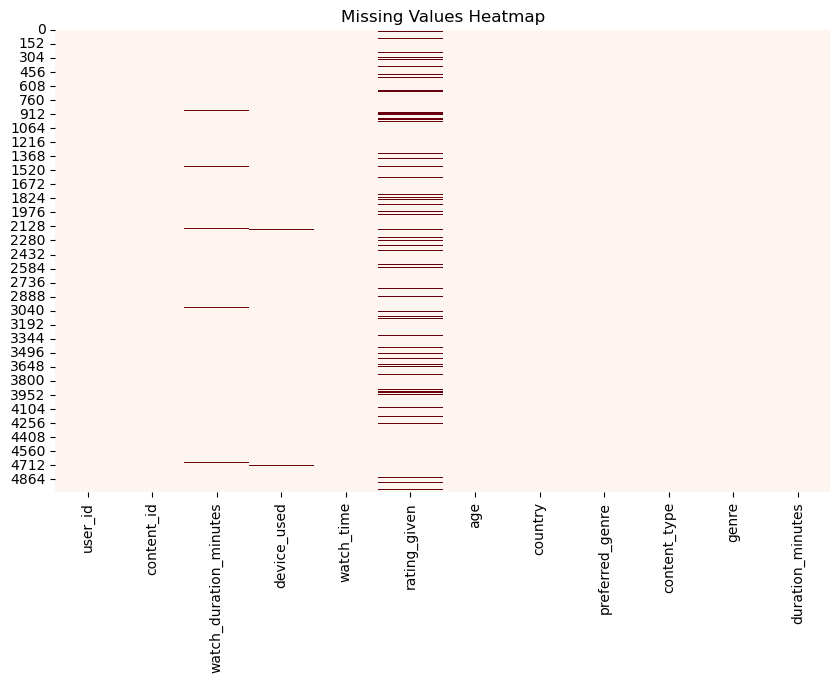

In [30]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title("Missing Values Heatmap")
plt.show()

#### Checking for Blank Strings in Object Columns 

In [31]:
for col in df.select_dtypes(include='object').columns:
    print(col, df[col].apply(lambda x: x == '').sum())

device_used 0
country 0
preferred_genre 0
content_type 0
genre 0


## Handeling missing values
### For Numerical Data

#### 1. Use Mean when:
###### Data is normally distributed (symmetric).
###### No or very few outliers.
###### You want to retain more variation in the data.

#### 2. Use Median when:
###### Data is skewed (left or right).
###### There are outliers that can distort the mean.
###### You want a more robust measure of central tendency.

#### 3. Use Mode when:
###### The data has repeating values.
###### You're dealing with discrete or categorical numeric data (like ratings: 1–5).
###### You want to fill missing values with the most common value

1.4570381643313386


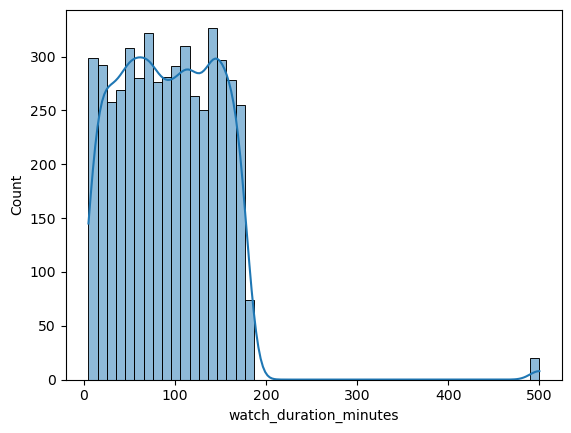

In [32]:
sns.histplot(df['watch_duration_minutes'], kde=True)  # Visual
print(df['watch_duration_minutes'].skew())           # Numerical skewness

In [33]:
df['watch_duration_minutes'].fillna(df['watch_duration_minutes'].median() , inplace = True)

In [34]:
Before_cap = df['watch_duration_minutes']

-0.20810361851529408


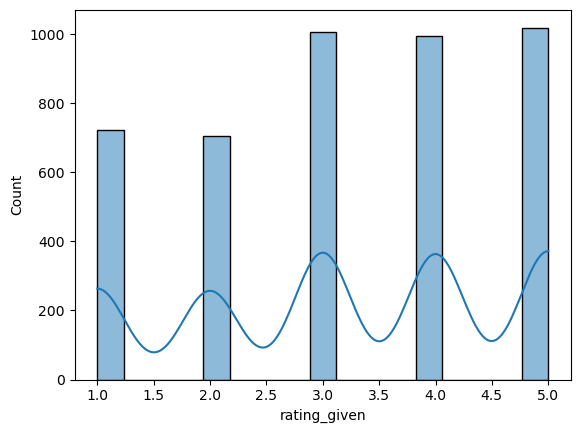

In [35]:
sns.histplot(df['rating_given'], kde=True)  # Visual
print(df['rating_given'].skew())           # Numerical skewness

In [36]:
df['rating_given'].fillna(df['rating_given'].mean() , inplace = True)

### For Ctegorical Data
##### a) Fill with Mode (most frequent)
##### b) Fill with Custom String

<Axes: xlabel='device_used', ylabel='Count'>

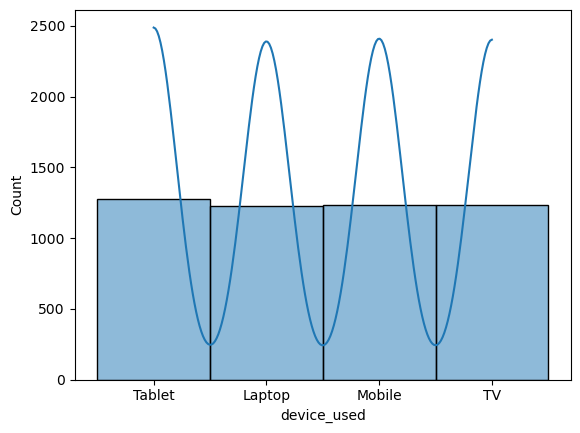

In [37]:
sns.histplot(df['device_used'], kde=True)  # Visual since it is categorical column we do not have numerical value for skewness

In [38]:
df['device_used'].mode()

0    Tablet
Name: device_used, dtype: object

In [39]:
df['device_used'].fillna('Tablet' , inplace = True)

#### Checking again if there are any null values or not

In [40]:
df.isnull().sum()

user_id                   0
content_id                0
watch_duration_minutes    0
device_used               0
watch_time                0
rating_given              0
age                       0
country                   0
preferred_genre           0
content_type              0
genre                     0
duration_minutes          0
dtype: int64

##### Now we have successfully imputed null values 

In [41]:
df.dtypes

user_id                            int64
content_id                         int64
watch_duration_minutes           float64
device_used                       object
watch_time                datetime64[ns]
rating_given                     float64
age                                int64
country                           object
preferred_genre                   object
content_type                      object
genre                             object
duration_minutes                   int64
dtype: object

##### Sometimes we may came across when we are imputing null values the data type of that column may change it is important to check the data type 


In [42]:
df[['watch_duration_minutes', 'device_used', 'rating_given']].head(10)

,watch_duration_minutes,device_used,rating_given
0,147.0,Tablet,4.000000
1,7.0,Tablet,5.000000
2,89.0,Laptop,1.000000
3,121.0,Mobile,2.000000
4,174.0,Mobile,2.000000
5,70.0,Laptop,5.000000
6,52.0,TV,4.000000
7,42.0,Mobile,5.000000
8,62.0,Laptop,2.000000
9,143.0,TV,3.199191


#### Visualization after cleaning data

Text(0.5, 1.0, 'Watch duration after impuatation')

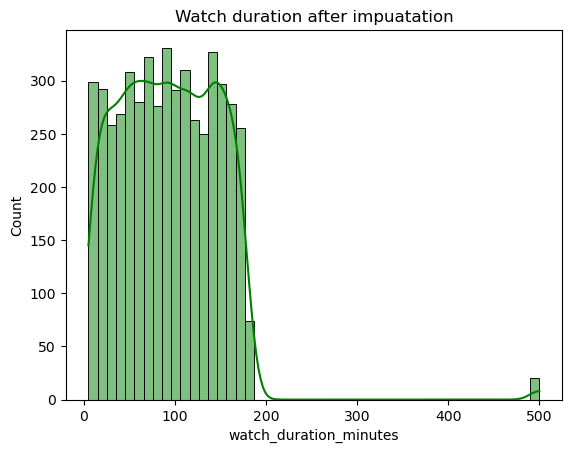

In [43]:
sns.histplot(df['watch_duration_minutes'],color='green',kde=True)  # Visual
plt.title('Watch duration after impuatation')

Text(0.5, 1.0, 'Rating after imputation')

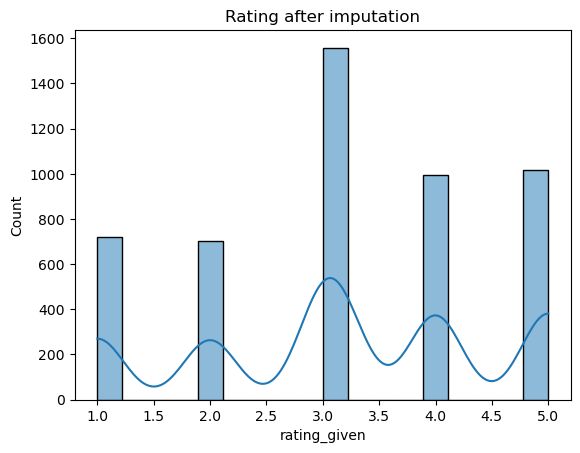

In [44]:
sns.histplot(df['rating_given'], kde=True)  # Visual
plt.title('Rating after imputation')

Text(0.5, 1.0, 'Device used after imputation')

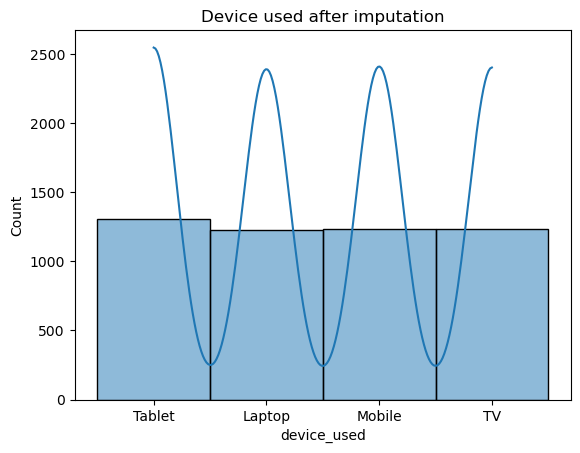

In [45]:
sns.histplot(df['device_used'], kde=True)  
plt.title('Device used after imputation')

In [46]:
##After imputation
df['device_used'].value_counts()

device_used
Tablet    1306
Mobile    1236
TV        1232
Laptop    1226
Name: count, dtype: int64

### Conclusion : 
##### We can see the clear difference between before and after imputation for Rating column Spike for 3.0 that is frequency has increased much due to it has too many null values compare to other 
##### For Watch duration minutes and Device used columns we don't see much difference from graphs since those columns have very less nulls . But for column 'device_used' we are checking value counts and from that we can see that for 'Tablet' value , frequency has been increased

## Outliers :

In [47]:
df.describe(include=['int','float'])

,user_id,content_id,watch_duration_minutes,rating_given,age,duration_minutes
count,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,247.7950,1503.282200,93.411000,3.199191,44.162200,104.530200
std,144.1893,852.811619,55.943093,1.303013,15.056867,42.548555
min,1.0000,1.000000,5.000000,1.000000,18.000000,30.000000
25%,123.0000,788.500000,50.000000,2.000000,32.000000,68.000000
50%,249.0000,1512.000000,92.000000,3.199191,45.000000,106.000000
75%,372.0000,2226.250000,137.000000,4.000000,57.000000,141.000000
max,500.0000,2999.000000,500.000000,5.000000,69.000000,179.000000


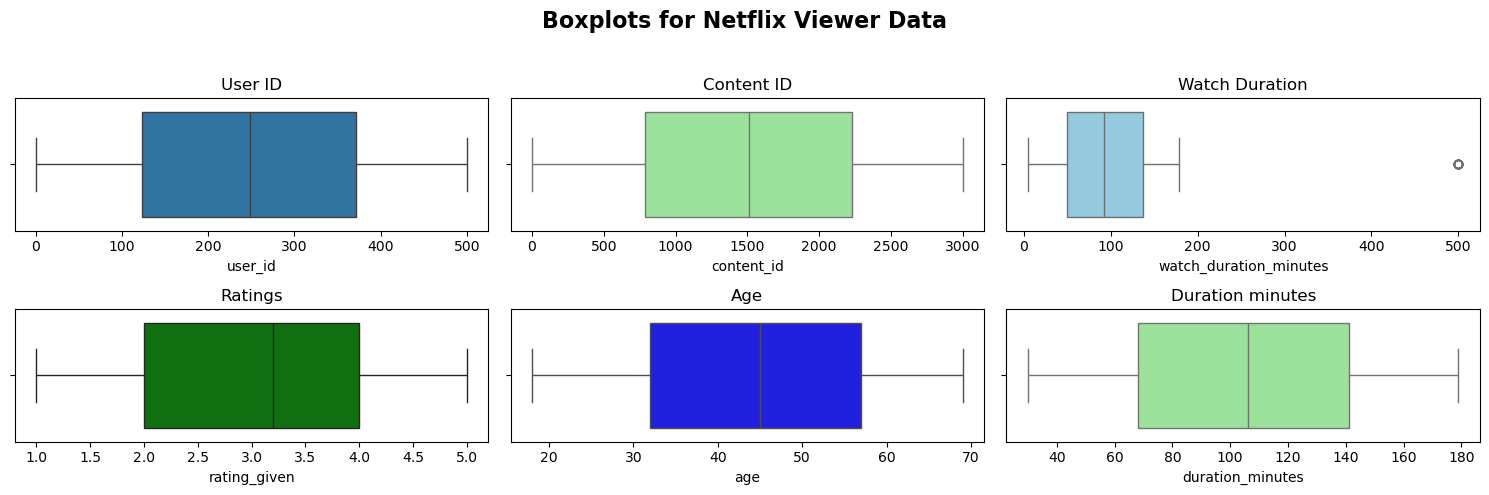

In [48]:
fig, axes = plt.subplots(2, 3, figsize=(15, 5))

sns.boxplot(df['user_id'],orient='h',ax=axes[0,0])
axes[0,0].set_title('User ID')

sns.boxplot(df['content_id'],orient='h',color='lightgreen',ax=axes[0,1])
axes[0,1].set_title('Content ID')

sns.boxplot(df['watch_duration_minutes'],orient='h',color='skyblue',ax=axes[0,2])
axes[0,2].set_title('Watch Duration')

sns.boxplot(df['rating_given'],orient='h',color='green',ax=axes[1,0])
axes[1,0].set_title('Ratings')

sns.boxplot(df['age'],orient='h',color='blue',ax=axes[1,1])
axes[1,1].set_title('Age')

sns.boxplot(df['duration_minutes'],orient='h',color='lightgreen',ax=axes[1,2])
axes[1,2].set_title('Duration minutes')

fig.suptitle("Boxplots for Netflix Viewer Data", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])

##### Outlier is detected for Watch duration column

### Conclusion : 
##### We have got an outlier (outliers) for watch duration column

#### Now we are finding IQR , UB and LB for each column since we can't rely completely on box-plots , statistical methods will give us 100% surety  

Creating a function so we don't have to write all the code for every column again and again 

In [49]:
def calc_every(Data,Colname):
    Q1 = Data[Colname].quantile(0.25) ##First/Lower Quartile
    print(f'Lower Quartile : {Q1}')
    Q3 = Data[Colname].quantile(0.75) ##Third/Upper Quartile
    print(f'Upper Quartile : {Q3}')
    IQR = Q3 - Q1
    Lower_Bound = Q1 - 1.5*IQR 
    print(f'Lower Bound : {Lower_Bound}')
    Upper_Bound = Q3 + 1.5*IQR
    print(f'Upper Bound : {Upper_Bound}')
    outliers = Data[(Data[Colname] < Lower_Bound) | (Data[Colname] > Upper_Bound)]
    print(f"Total Outliers Detected: {outliers.shape[0]}")
    
    return outliers[Colname] , Lower_Bound , Upper_Bound

Using function for every numerical column to crosscheck using statistical formula

In [50]:
calc_every(Data=df,Colname='user_id')

Lower Quartile : 123.0
Upper Quartile : 372.0
Lower Bound : -250.5
Upper Bound : 745.5
Total Outliers Detected: 0


(Series([], Name: user_id, dtype: int64), -250.5, 745.5)

In [51]:
calc_every(Data=df,Colname='content_id')

Lower Quartile : 788.5
Upper Quartile : 2226.25
Lower Bound : -1368.125
Upper Bound : 4382.875
Total Outliers Detected: 0


(Series([], Name: content_id, dtype: int64), -1368.125, 4382.875)

In [52]:
calc_every(Data=df,Colname='rating_given')

Lower Quartile : 2.0
Upper Quartile : 4.0
Lower Bound : -1.0
Upper Bound : 7.0
Total Outliers Detected: 0


(Series([], Name: rating_given, dtype: float64), -1.0, 7.0)

In [53]:
calc_every(Data=df,Colname='age')

Lower Quartile : 32.0
Upper Quartile : 57.0
Lower Bound : -5.5
Upper Bound : 94.5
Total Outliers Detected: 0


(Series([], Name: age, dtype: int64), -5.5, 94.5)

In [54]:
calc_every(Data=df,Colname='duration_minutes')

Lower Quartile : 68.0
Upper Quartile : 141.0
Lower Bound : -41.5
Upper Bound : 250.5
Total Outliers Detected: 0


(Series([], Name: duration_minutes, dtype: int64), -41.5, 250.5)

In [55]:
calc_every(Data=df,Colname='watch_duration_minutes')

Lower Quartile : 50.0
Upper Quartile : 137.0
Lower Bound : -80.5
Upper Bound : 267.5
Total Outliers Detected: 20


(187     500.0
 295     500.0
 756     500.0
 1420    500.0
 1522    500.0
 1800    500.0
 2042    500.0
 2261    500.0
 2381    500.0
 2714    500.0
 3051    500.0
 3495    500.0
 3533    500.0
 3781    500.0
 3904    500.0
 4042    500.0
 4140    500.0
 4270    500.0
 4578    500.0
 4853    500.0
 Name: watch_duration_minutes, dtype: float64,
 -80.5,
 267.5)

In [56]:
out,Lower_Bound,Upper_Bound = calc_every(Data=df,Colname='watch_duration_minutes')

Lower Quartile : 50.0
Upper Quartile : 137.0
Lower Bound : -80.5
Upper Bound : 267.5
Total Outliers Detected: 20


#### Here we got lower bound for watch duration -80.5 which is negative term but w.k.t time can't be negative so we will make it as zero 

In [57]:
if Lower_Bound < 0 :
    Lower_Bound = 0
else:
    Lower_Bound = Lower_Bound

print(f'Lower Bound : {Lower_Bound}')

Lower Bound : 0


In [58]:
## Now we are checking outliers for watch duration column
outliers=df[(df['watch_duration_minutes']<Lower_Bound) | (df['watch_duration_minutes']>Upper_Bound)]
outliers['watch_duration_minutes']

187     500.0
295     500.0
756     500.0
1420    500.0
1522    500.0
1800    500.0
2042    500.0
2261    500.0
2381    500.0
2714    500.0
3051    500.0
3495    500.0
3533    500.0
3781    500.0
3904    500.0
4042    500.0
4140    500.0
4270    500.0
4578    500.0
4853    500.0
Name: watch_duration_minutes, dtype: float64

In [59]:
## How many outliers we are having for watch duration column
len(outliers)

20

####  why treatment is needed:
###### 1. They can distort the average (mean)
###### 2. They affect machine learning models
###### 3. They make plots misleading
###### 4. They can be data entry errors
###### 5. They reduce model accuracy

## How to deal with Outliers 
#### Remove the outlier (if it’s a clear mistake)
#### Cap/clip the value (replace with a maximum allowed value)
#### Transform the data (e.g., using log or square root)

In [60]:
## Capping with maximum / minimum value

df['watch_duration_minutes']=np.where(
                       df['watch_duration_minutes']<Lower_Bound,Lower_Bound,np.where(
             df['watch_duration_minutes']>Upper_Bound,Upper_Bound ,df['watch_duration_minutes'])
)

In [61]:
df['watch_duration_minutes'].describe()   ##After capping

count    5000.000000
mean       92.481000
std        50.878541
min         5.000000
25%        50.000000
50%        92.000000
75%       137.000000
max       267.500000
Name: watch_duration_minutes, dtype: float64

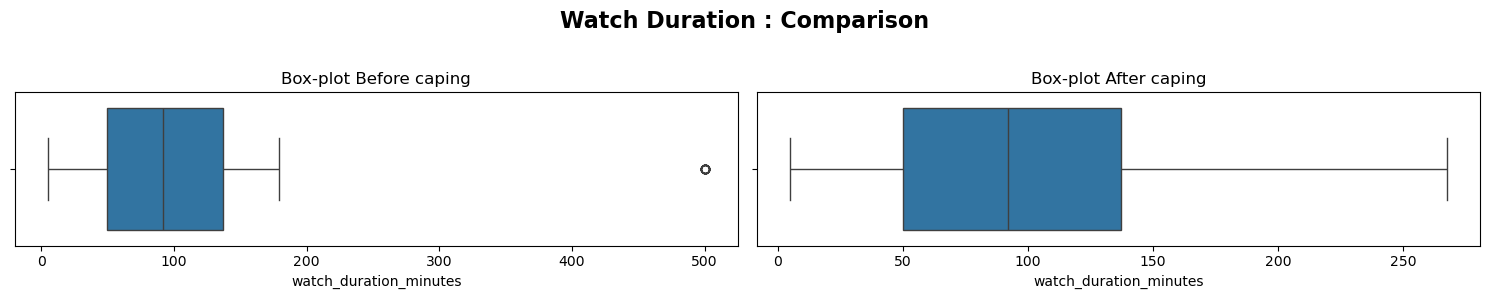

In [62]:
fig , axes = plt.subplots(1,2,figsize=(15,3))

sns.boxplot(df['watch_duration_minutes'],ax=axes[1],orient='h')
axes[1].set_title('Box-plot After caping') 

sns.boxplot(Before_cap,ax=axes[0],orient='h')
axes[0].set_title('Box-plot Before caping')

fig.suptitle('Watch Duration : Comparison',fontsize=16,fontweight='bold')
plt.tight_layout(rect=[0,0,1,0.95])

#### Feature Engineering

###### This tells us how much of a movie/show the user watched compared to its total length.

In [63]:
df['watch_completion_ratio'] = df['watch_duration_minutes'] / df['duration_minutes']
df['watch_completion_ratio'] = df['watch_completion_ratio'].clip(0, 1)  # Ensure no values over 1

###### Extract the weekday to find out when users are most active (Monday = 0, Sunday = 6).

In [64]:
df['day_of_week'] = df['watch_time'].dt.dayofweek

###### Segment users into age buckets — this helps group users by demographic.

In [65]:
bins = [0, 25, 35, 50, 100]
labels = ['18–25', '26–35', '36–50', '50+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

#### Validation 

In [66]:
df[['watch_completion_ratio', 'day_of_week', 'age_group']].head()

,watch_completion_ratio,day_of_week,age_group
0,0.948387,1,18–25
1,0.045161,4,36–50
2,0.574194,5,26–35
3,1.000000,2,18–25
4,1.000000,3,36–50


In [67]:
df['watch_completion_ratio'].describe()

count    5000.000000
mean        0.731590
std         0.314074
min         0.028090
25%         0.471590
50%         0.887607
75%         1.000000
max         1.000000
Name: watch_completion_ratio, dtype: float64

In [68]:
df['day_of_week'].value_counts().sort_index()  # Should be 0–6

day_of_week
0    709
1    720
2    742
3    737
4    724
5    683
6    685
Name: count, dtype: int64

In [69]:
df['age_group'].value_counts()

age_group
50+      2074
36–50    1442
26–35     770
18–25     714
Name: count, dtype: int64

In [70]:
df[['watch_completion_ratio', 'day_of_week', 'age_group']].isnull().sum()

watch_completion_ratio    0
day_of_week               0
age_group                 0
dtype: int64

#### Visualization for created columns

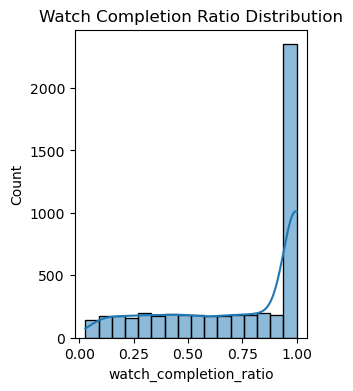

In [71]:
plt.figure(figsize=(3,4))
sns.histplot(df['watch_completion_ratio'], kde=True)
plt.title("Watch Completion Ratio Distribution")
plt.show()

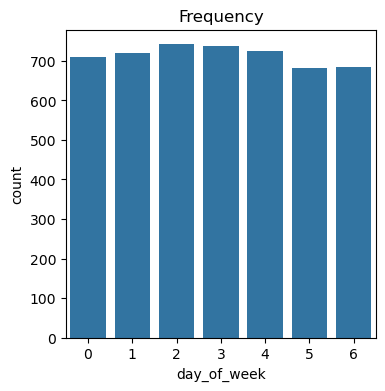

In [72]:
plt.figure(figsize=(4,4))
sns.countplot(x='day_of_week', data=df)
plt.title("Frequency")
plt.show()

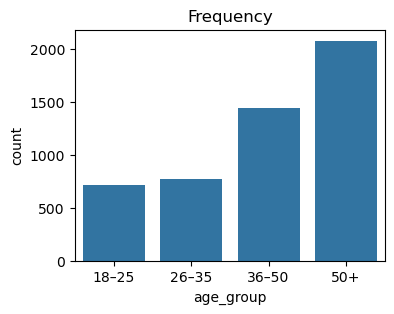

In [73]:
plt.figure(figsize=(4,3))
sns.countplot(x='age_group', data=df)
plt.title("Frequency")
plt.show()

### Final Data set Preparation

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   user_id                 5000 non-null   int64         
 1   content_id              5000 non-null   int64         
 2   watch_duration_minutes  5000 non-null   float64       
 3   device_used             5000 non-null   object        
 4   watch_time              5000 non-null   datetime64[ns]
 5   rating_given            5000 non-null   float64       
 6   age                     5000 non-null   int64         
 7   country                 5000 non-null   object        
 8   preferred_genre         5000 non-null   object        
 9   content_type            5000 non-null   object        
 10  genre                   5000 non-null   object        
 11  duration_minutes        5000 non-null   int64         
 12  watch_completion_ratio  5000 non-null   float64      

In [75]:
df.isnull().sum()

user_id                   0
content_id                0
watch_duration_minutes    0
device_used               0
watch_time                0
rating_given              0
age                       0
country                   0
preferred_genre           0
content_type              0
genre                     0
duration_minutes          0
watch_completion_ratio    0
day_of_week               0
age_group                 0
dtype: int64

#### Grouping Columns Logically

In [76]:
df[['user_id', 'age', 'age_group', 'preferred_genre', 'content_id', 'genre', 
    'duration_minutes','watch_duration_minutes', 'device_used', 'watch_time',
     'watch_completion_ratio', 'day_of_week']].head(2)

,user_id,age,age_group,preferred_genre,content_id,genre,duration_minutes,watch_duration_minutes,device_used,watch_time,watch_completion_ratio,day_of_week
0,380,23,18–25,Documentary,955,Drama,155,147.0,Tablet,2024-07-30 08:42:52.381395,0.948387,1
1,353,47,36–50,Horror,955,Drama,155,7.0,Tablet,2024-08-23 08:42:52.421287,0.045161,4


In [77]:
df.columns

Index(['user_id', 'content_id', 'watch_duration_minutes', 'device_used',
       'watch_time', 'rating_given', 'age', 'country', 'preferred_genre',
       'content_type', 'genre', 'duration_minutes', 'watch_completion_ratio',
       'day_of_week', 'age_group'],
      dtype='object')

Drop unnecessary column that aren't necessary for analysis

In [78]:
columns_to_drop = [
    'watch_time',             
    'duration_minutes',       
    'content_id','user_id'            
]

df.drop(columns=columns_to_drop, inplace=True)

In [79]:
df.head(3)

,watch_duration_minutes,device_used,rating_given,age,country,preferred_genre,content_type,genre,watch_completion_ratio,day_of_week,age_group
0,147.0,Tablet,4.0,23,Canada,Documentary,Movie,Drama,0.948387,1,18–25
1,7.0,Tablet,5.0,47,Canada,Horror,Movie,Drama,0.045161,4,36–50
2,89.0,Laptop,1.0,33,Germany,Sci-Fi,Movie,Drama,0.574194,5,26–35


#### Saving the final data into csv file

In [80]:
df.to_csv('Netflix_clean_data', index=False)

In [81]:
df.to_pickle('Netflix_clean_data.pkl')

## Buissness Question and Visualization

##### Q1: Which genres have the highest average watch completion ratio?

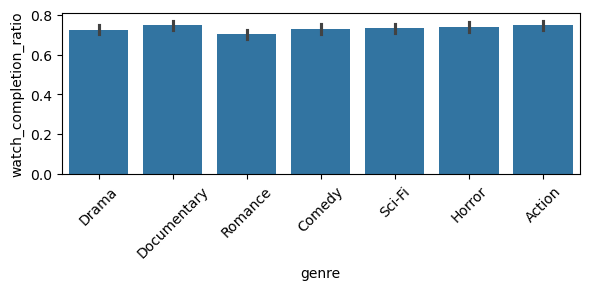

In [82]:
plt.figure(figsize=(6,3))
sns.barplot(data=df, x='genre', y='watch_completion_ratio', estimator=np.mean)
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.tight_layout()       # Adjusts plot to fit labels
plt.show()

Interpretation:
Genres like Documentary and Drama have the highest completion ratios, meaning users tend to finish what they start.
Comedy and Horror show slightly lower engagement — possibly due to shorter attention spans or niche appeal.

##### Q2: What devices are most commonly used to watch content?

<Axes: xlabel='device_used', ylabel='count'>

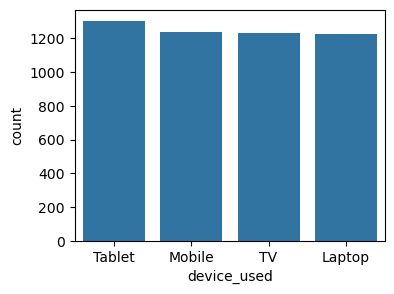

In [83]:
plt.figure(figsize=(4,3))
sns.countplot(data=df, x='device_used',order=df['device_used'].value_counts().index)

Interpretation:
Tablet devices dominate, followed by TVs and mobiles.
laptop use is significantly lower, suggesting it may not be a core focus platform.

#####  Q3: How does engagement vary by age group?

<Axes: xlabel='age_group', ylabel='watch_completion_ratio'>

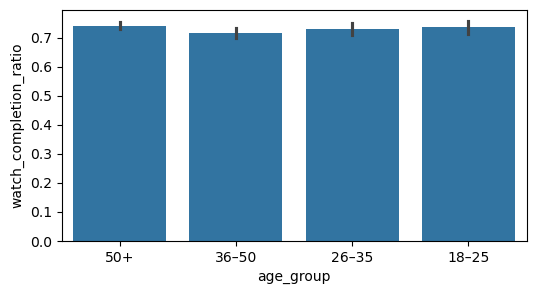

In [84]:
plt.figure(figsize=(6,3))
sns.barplot(data=df, x='age_group', y='watch_completion_ratio', estimator=np.mean,order=df['age_group'].value_counts().index)

Interpretation:
The 50+ age group shows the highest average completion, followed by 36–50.
Younger groups show slightly less engagement, possibly due to time constraints or content mismatch.

##### Q4: What’s the difference between preferred genres vs. watched genres?

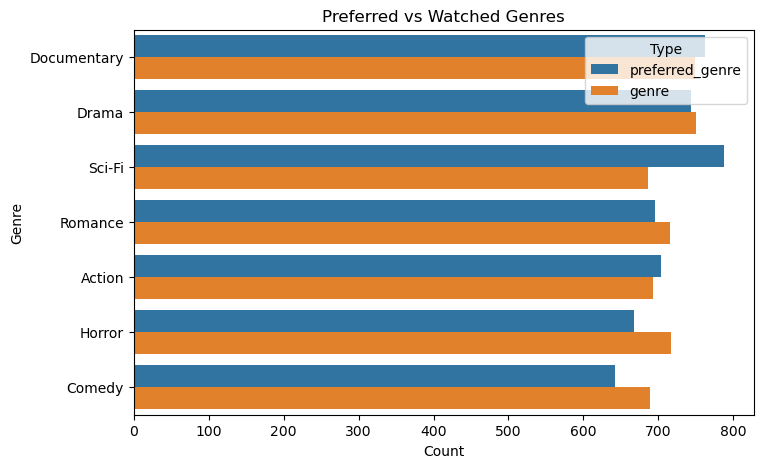

In [85]:
# Combine both columns into one for better plotting
df_melted = pd.melt(df, value_vars=['preferred_genre', 'genre'], var_name='Type', value_name='Genre')

# Plot with hue
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df_melted, y='Genre', hue='Type', order=df_melted['Genre'].value_counts().index)
ax.set_title("Preferred vs Watched Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.legend(title="Type")


Interpretation:
Users say they prefer Sci-Fi and Documentaries, but Drama is the most-watched genre.
There’s a clear gap between preferences and behavior, which the recommendation system can use to balance “what you like” vs “what you actually watch.”

##### Q5: How does content type vary across days of the week?

<Axes: xlabel='day_of_week', ylabel='count'>

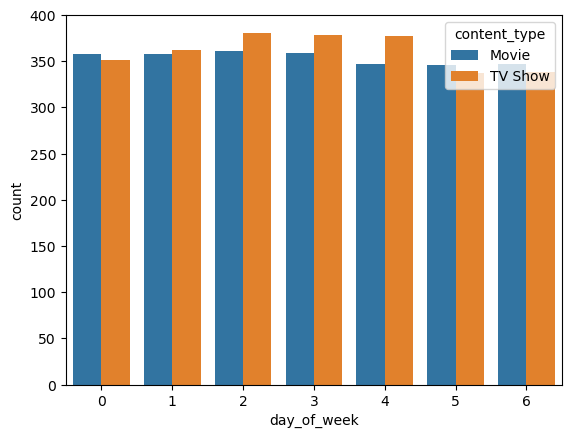

In [86]:
sns.countplot(data=df, x='day_of_week', hue='content_type')

Interpretation:
TV Shows are more popular on week days (Wednesday & Thursday), suggesting binge behavior.
Movies are watched fairly consistently across the week.